2024-12-18 14:21:45.360841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734531705.379225  797631 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734531705.384764  797631 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 14:21:45.411869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180371 entries, 0 to 180370
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180371 non-null  int64  
 1   dur                180371 non-null  float64
 2   proto              180371 non-null  object 
 3   service            180371 non-null  object 
 4   state              180371 non-null  object 
 5   spkts              180371 non-null  int64  
 6   dpkts              180371 non-null  int64  
 7   sbytes             180371 non-null  int64  
 8   dbytes             180371 non-null  int64  
 9   rate               180371 non-null  float64
 10  sttl               180371 non-null  int64  
 11  dttl               180371 non-null  int64  
 12  sload              180371 non-null  float64
 13  dload              180371 non-null  float64
 14  sloss              180371 non-null  int64  
 15  dloss              180371 non-null  

/tmp/ipykernel_797631/432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


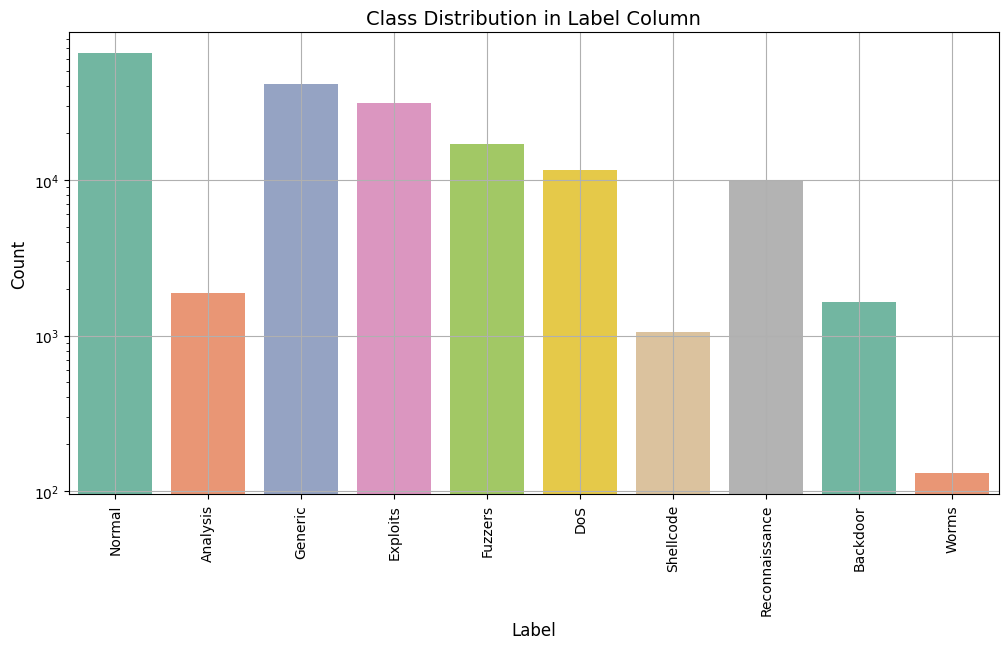

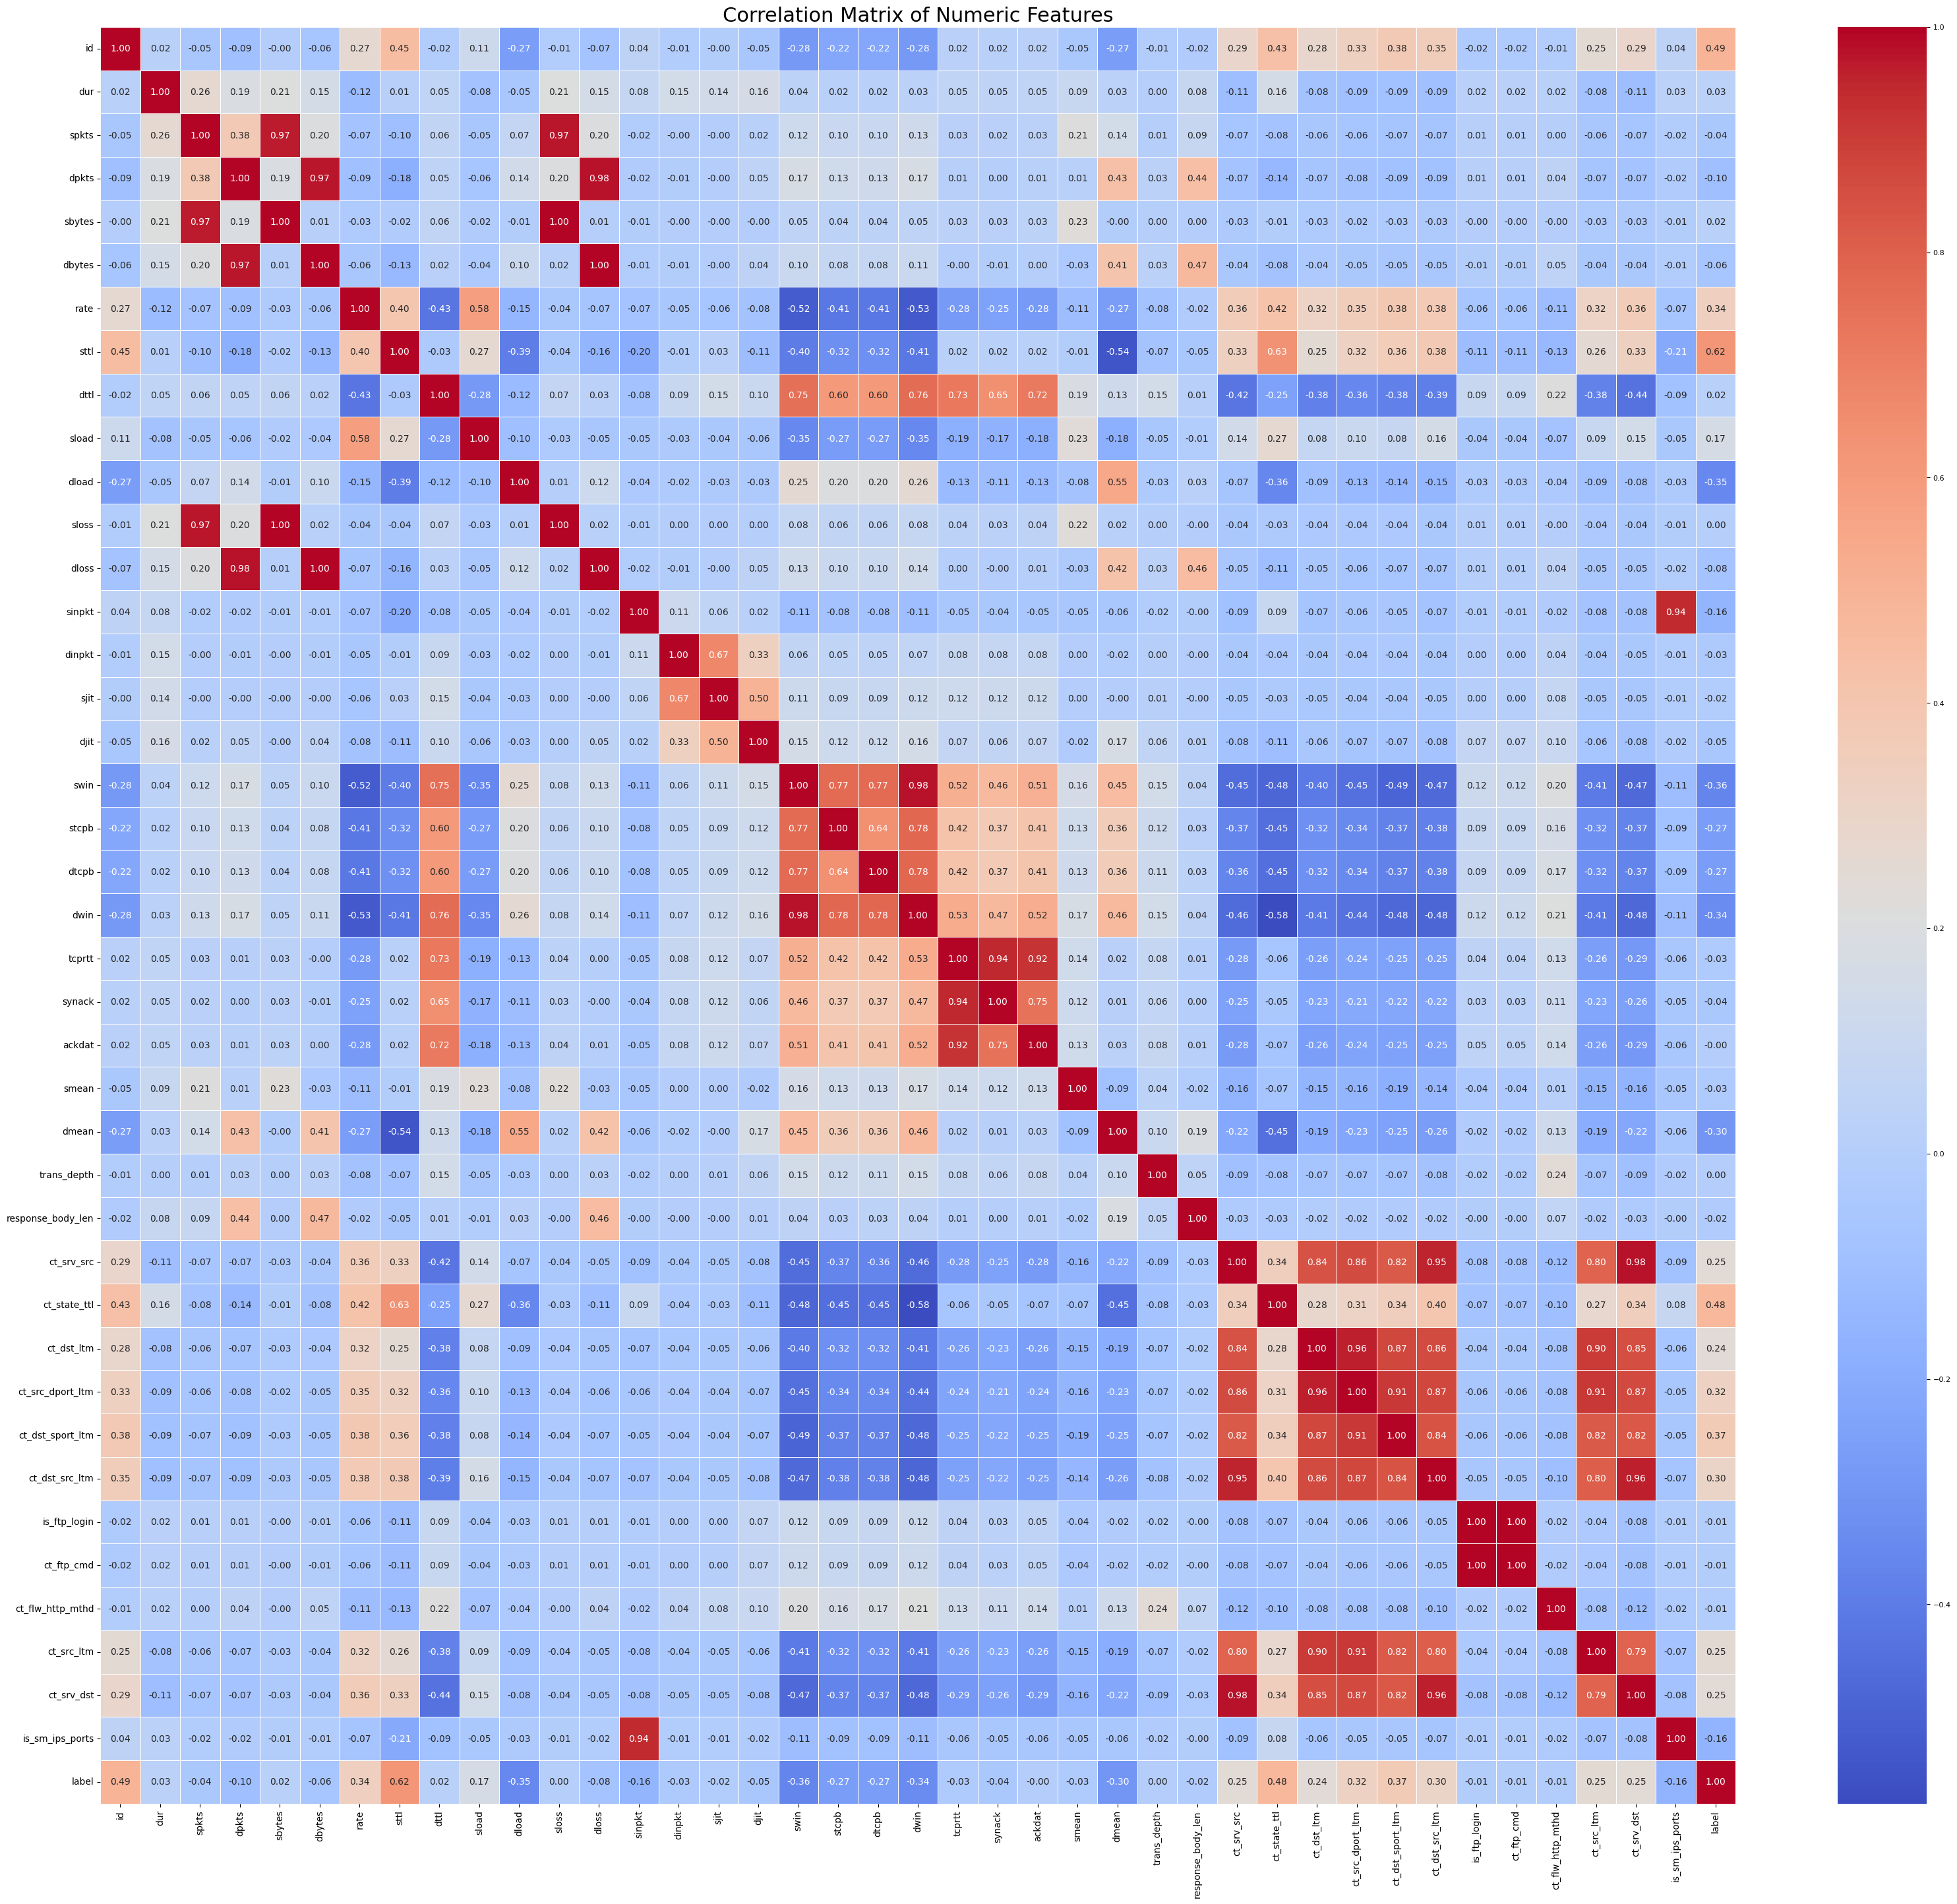

In [1]:
import import_ipynb
%run UNSW_NB15_data_preprocessing.ipynb


Validation Accuracy: 0.998603
Test Accuracy: 0.999069
RF_accuracy: 0.999069


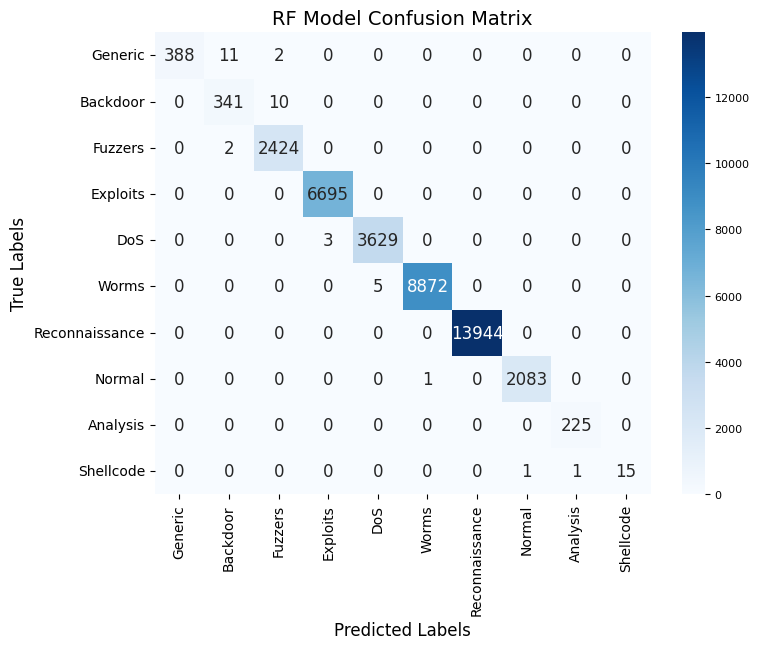

RF Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      0.97      0.98       401
      Backdoor       0.96      0.97      0.97       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      0.88      0.94        17

      accuracy                           1.00     38652
     macro avg       1.00      0.98      0.99     38652
  weighted avg       1.00      1.00      1.00     38652



In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_random_forest(X_train, y_train, X_val, y_val, X_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = rf_model.predict(X_val)
    test_predictions = rf_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"RF_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("RF Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("RF Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.999715
Test Accuracy: 0.999845
MLP_accuracy: 0.999845


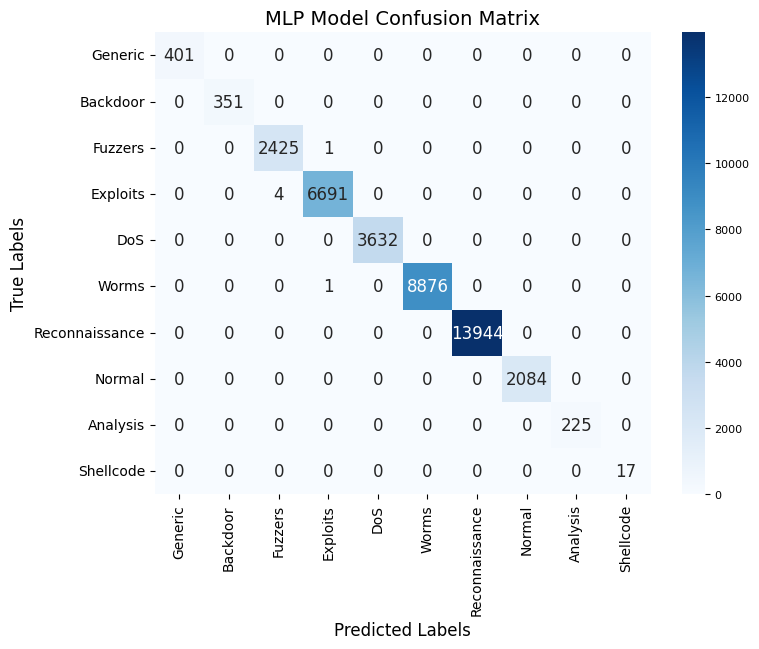

MLP Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_mlp(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize MLP model with one hidden layer of 100 units and a fixed random state
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    mlp_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = mlp_model.predict(X_val)
    test_predictions = mlp_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_mlp(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"MLP_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("MLP Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("MLP Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.998862
Test Accuracy: 0.998965
SVM_accuracy: 0.998965


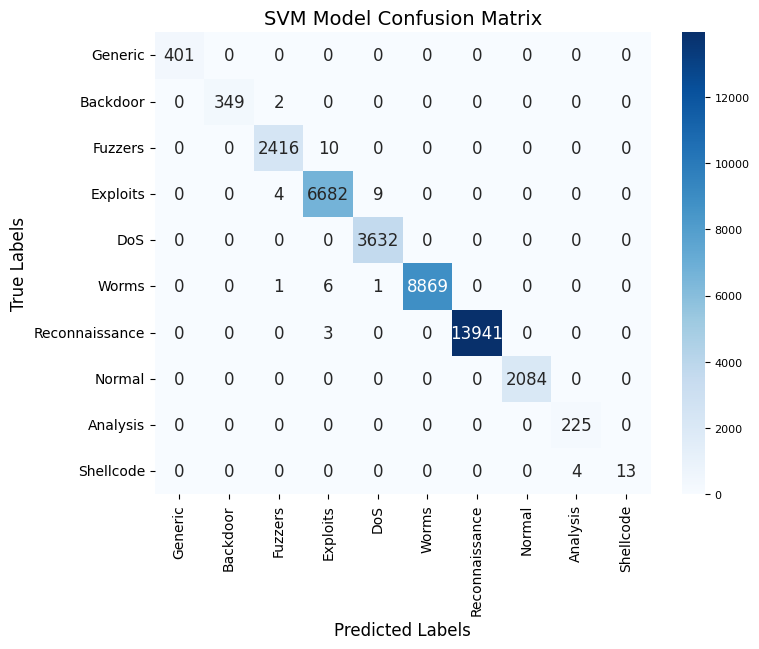

SVM Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      0.99      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       0.98      1.00      0.99       225
     Shellcode       1.00      0.76      0.87        17

      accuracy                           1.00     38652
     macro avg       1.00      0.98      0.98     38652
  weighted avg       1.00      1.00      1.00     38652



In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_svm(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize SVM model with a radial basis function kernel (RBF)
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = svm_model.predict(X_val)
    test_predictions = svm_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_svm(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"SVM_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("SVM Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("SVM Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 1.000000
Test Accuracy: 1.000000
Bagging_accuracy: 1.000000


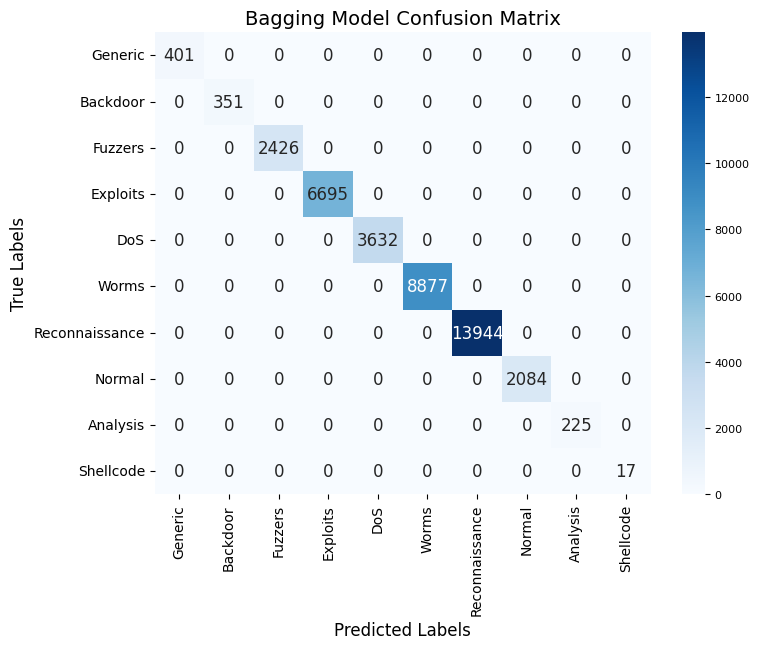

Bagging Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

def train_bagging(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize BaggingClassifier with a DecisionTree as base estimator
    bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
    bagging_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = bagging_model.predict(X_val)
    test_predictions = bagging_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_bagging(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"Bagging_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("Bagging Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("Bagging Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.987296
Test Accuracy: 0.987685
KNN_accuracy: 0.987685


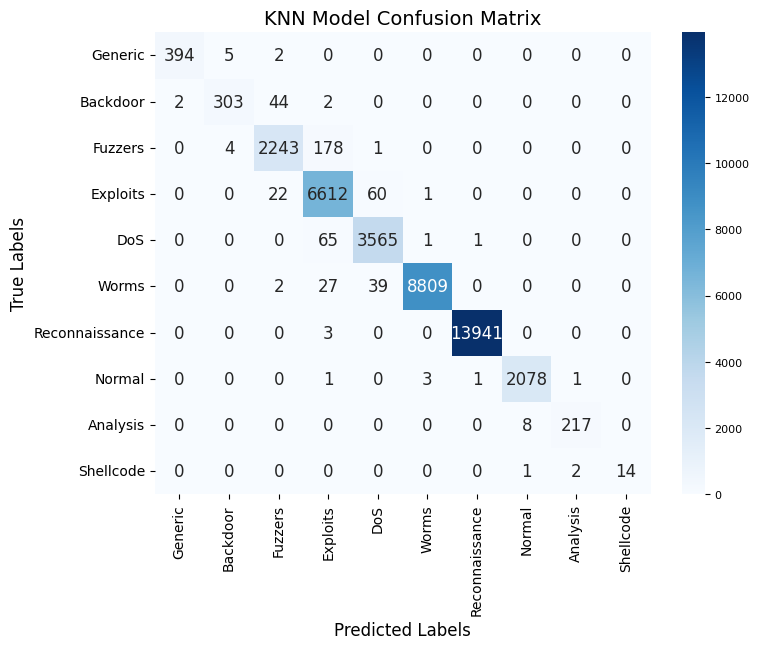

KNN Model Classification Report:
                precision    recall  f1-score   support

       Generic       0.99      0.98      0.99       401
      Backdoor       0.97      0.86      0.91       351
       Fuzzers       0.97      0.92      0.95      2426
      Exploits       0.96      0.99      0.97      6695
           DoS       0.97      0.98      0.98      3632
         Worms       1.00      0.99      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       0.99      0.96      0.98       225
     Shellcode       1.00      0.82      0.90        17

      accuracy                           0.99     38652
     macro avg       0.98      0.95      0.97     38652
  weighted avg       0.99      0.99      0.99     38652



In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_knn(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize KNN classifier with 5 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = knn_model.predict(X_val)
    test_predictions = knn_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_knn(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"KNN_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("KNN Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("KNN Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Accuracy: 0.599612
Test Accuracy: 0.600797
AdaBoost_accuracy: 0.600797


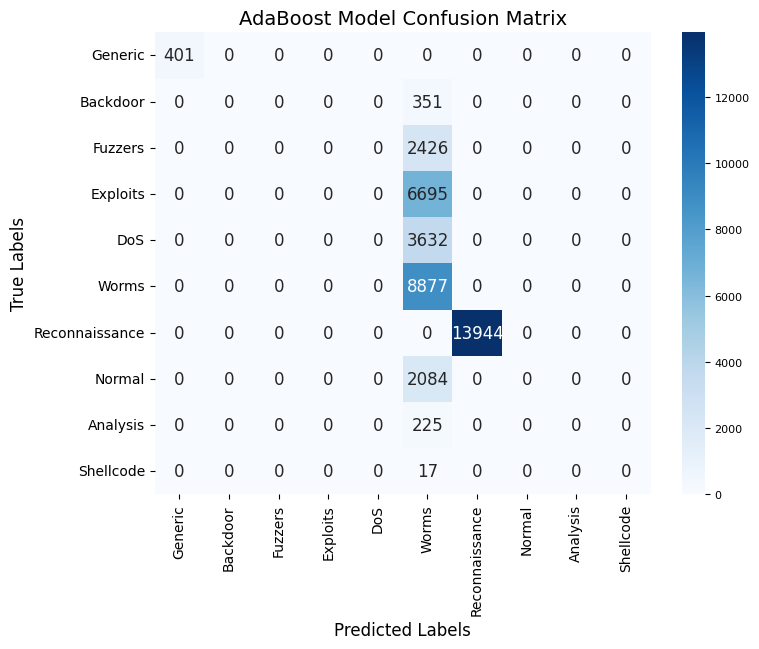

AdaBoost Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       0.00      0.00      0.00       351
       Fuzzers       0.00      0.00      0.00      2426
      Exploits       0.00      0.00      0.00      6695
           DoS       0.00      0.00      0.00      3632
         Worms       0.37      1.00      0.54      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       0.00      0.00      0.00      2084
      Analysis       0.00      0.00      0.00       225
     Shellcode       0.00      0.00      0.00        17

      accuracy                           0.60     38652
     macro avg       0.24      0.30      0.25     38652
  weighted avg       0.46      0.60      0.49     38652



/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_adaboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize AdaBoostClassifier without explicitly defining base_estimator (default is DecisionTree)
    adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
    adaboost_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = adaboost_model.predict(X_val)
    test_predictions = adaboost_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_adaboost(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"AdaBoost_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("AdaBoost Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("AdaBoost Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 1.000000
Test Accuracy: 1.000000
DecisionTree_accuracy: 1.000000


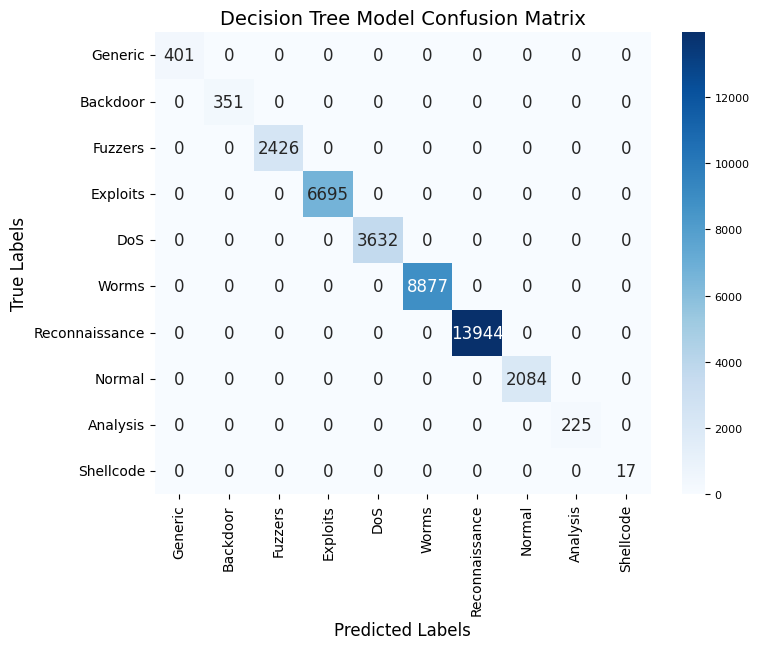

Decision Tree Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize DecisionTreeClassifier
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = dt_model.predict(X_val)
    test_predictions = dt_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"DecisionTree_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("Decision Tree Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("Decision Tree Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


/home/work/soyeong/alvy/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 1.000000
Test Accuracy: 1.000000
XGBoost_accuracy: 1.000000


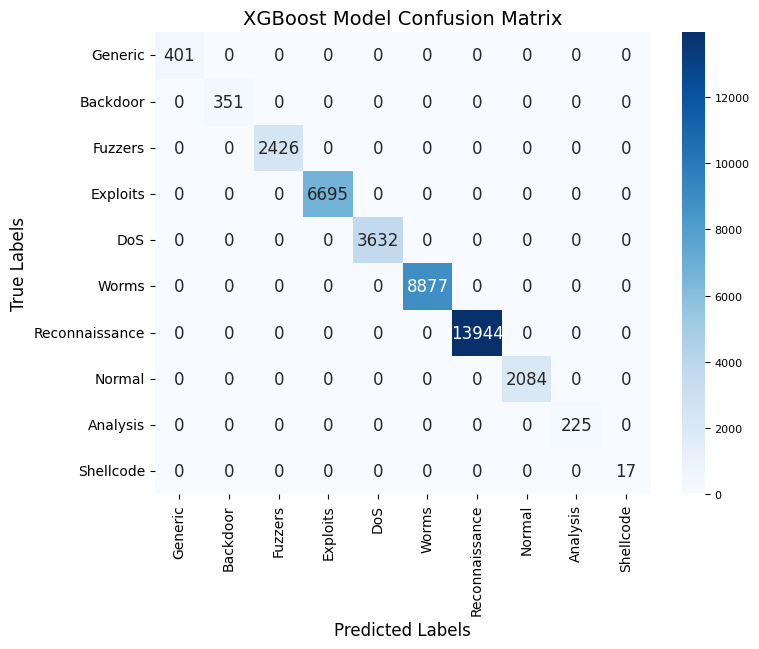

XGBoost Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_xgboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize XGBClassifier
    xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    xgboost_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = xgboost_model.predict(X_val)
    test_predictions = xgboost_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_xgboost(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"XGBoost_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("XGBoost Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("XGBoost Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


0:	learn: 1.4924168	total: 306ms	remaining: 5m 5s
100:	learn: 0.0006969	total: 19s	remaining: 2m 48s
200:	learn: 0.0001015	total: 37.9s	remaining: 2m 30s
300:	learn: 0.0000467	total: 57.1s	remaining: 2m 12s
400:	learn: 0.0000288	total: 1m 16s	remaining: 1m 54s
500:	learn: 0.0000210	total: 1m 35s	remaining: 1m 34s
600:	learn: 0.0000162	total: 1m 54s	remaining: 1m 15s
700:	learn: 0.0000134	total: 2m 13s	remaining: 57s
800:	learn: 0.0000113	total: 2m 31s	remaining: 37.5s
900:	learn: 0.0000098	total: 2m 48s	remaining: 18.6s
999:	learn: 0.0000087	total: 3m 6s	remaining: 0us
Validation Accuracy: 1.000000
Test Accuracy: 1.000000
CatBoost_accuracy: 1.000000


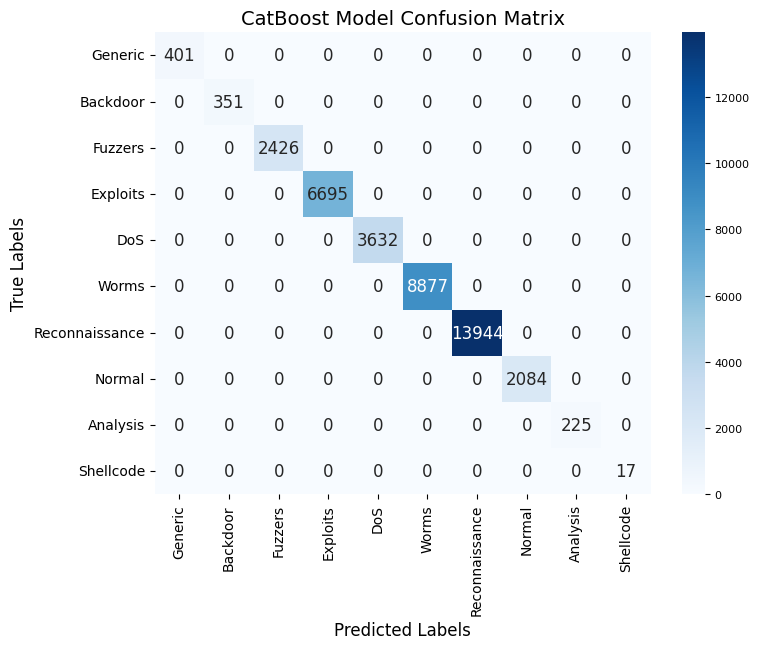

CatBoost Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_catboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize CatBoostClassifier
    catboost_model = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.1, depth=6, cat_features=[])
    catboost_model.fit(X_train, y_train, cat_features=[], verbose=100)  # verbose=100 for progress info
    
    # Predict on validation and test sets
    val_predictions = catboost_model.predict(X_val)
    test_predictions = catboost_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_catboost(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"CatBoost_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("CatBoost Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("CatBoost Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 1.000000
Test Accuracy: 1.000000
GNB_accuracy: 1.000000


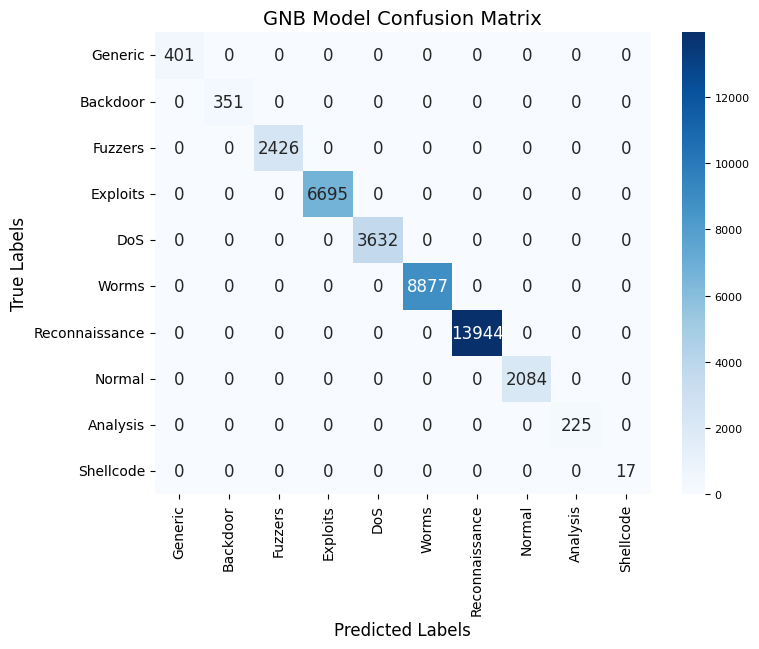

GNB Model Classification Report:
                precision    recall  f1-score   support

       Generic       1.00      1.00      1.00       401
      Backdoor       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
      Exploits       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
         Worms       1.00      1.00      1.00      8877
Reconnaissance       1.00      1.00      1.00     13944
        Normal       1.00      1.00      1.00      2084
      Analysis       1.00      1.00      1.00       225
     Shellcode       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_gnb(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize GNB classifier
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = gnb_model.predict(X_val)
    test_predictions = gnb_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_gnb(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"GNB_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("GNB Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("GNB Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.999767
Test Accuracy: 0.999845
LR_accuracy: 0.999845


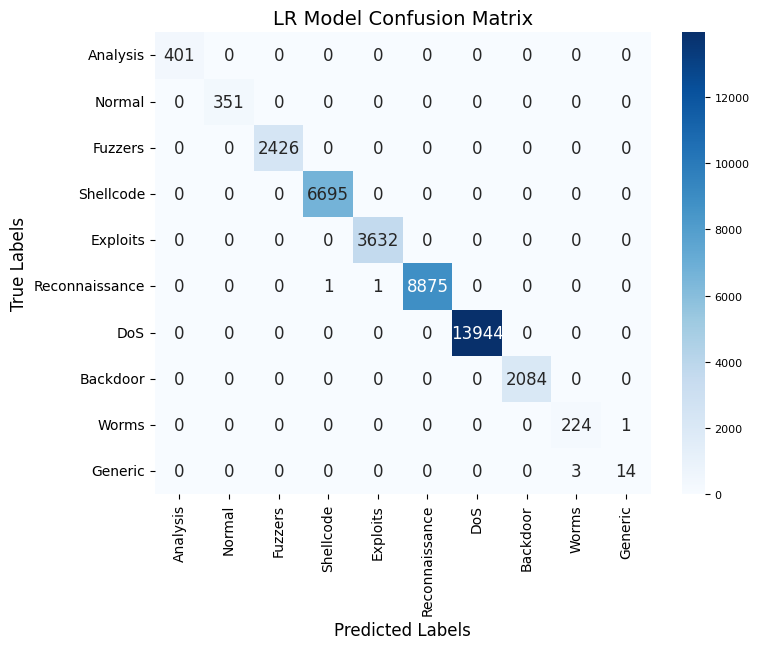

LR Model Classification Report:
                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       401
        Normal       1.00      1.00      1.00       351
       Fuzzers       1.00      1.00      1.00      2426
     Shellcode       1.00      1.00      1.00      6695
      Exploits       1.00      1.00      1.00      3632
Reconnaissance       1.00      1.00      1.00      8877
           DoS       1.00      1.00      1.00     13944
      Backdoor       1.00      1.00      1.00      2084
         Worms       0.99      1.00      0.99       225
       Generic       0.93      0.82      0.88        17

      accuracy                           1.00     38652
     macro avg       0.99      0.98      0.99     38652
  weighted avg       1.00      1.00      1.00     38652



: 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_lr(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = lr_model.predict(X_val)
    test_predictions = lr_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_lr(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"LR_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("LR Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("LR Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 1.000000
Test Accuracy: 1.000000
GB_accuracy: 1.000000


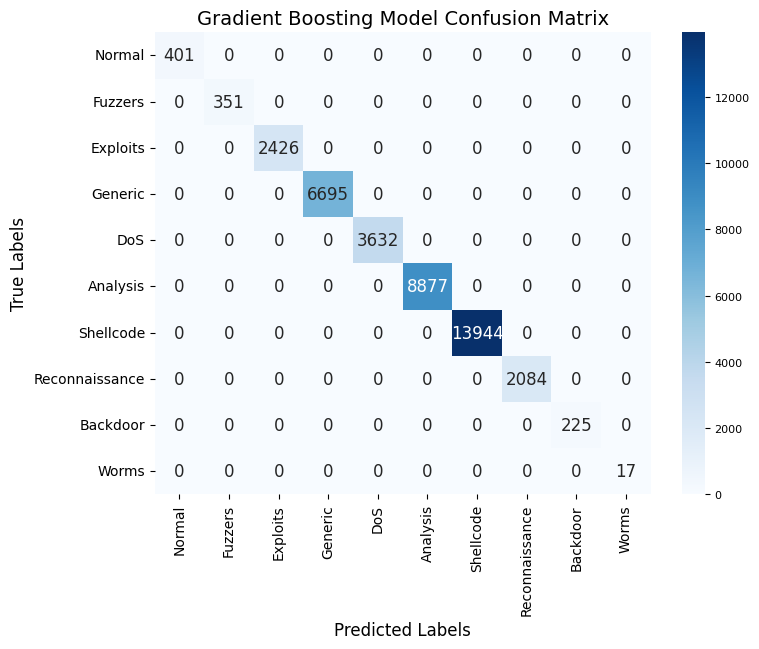

Gradient Boosting Model Classification Report:
                precision    recall  f1-score   support

        Normal       1.00      1.00      1.00       401
       Fuzzers       1.00      1.00      1.00       351
      Exploits       1.00      1.00      1.00      2426
       Generic       1.00      1.00      1.00      6695
           DoS       1.00      1.00      1.00      3632
      Analysis       1.00      1.00      1.00      8877
     Shellcode       1.00      1.00      1.00     13944
Reconnaissance       1.00      1.00      1.00      2084
      Backdoor       1.00      1.00      1.00       225
         Worms       1.00      1.00      1.00        17

      accuracy                           1.00     38652
     macro avg       1.00      1.00      1.00     38652
  weighted avg       1.00      1.00      1.00     38652



In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_gb(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = gb_model.predict(X_val)
    test_predictions = gb_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_gb(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"GB_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("Gradient Boosting Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("Gradient Boosting Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.847529
Test Accuracy: 0.846192
RidgeClassifier_accuracy: 0.846192


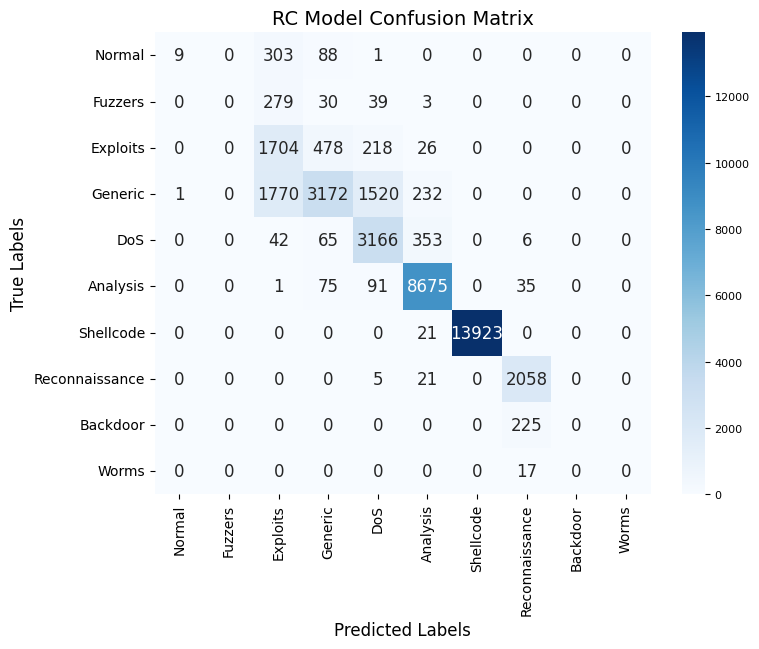

RC Model Classification Report:
                precision    recall  f1-score   support

        Normal       0.90      0.02      0.04       401
       Fuzzers       0.00      0.00      0.00       351
      Exploits       0.42      0.70      0.52      2426
       Generic       0.81      0.47      0.60      6695
           DoS       0.63      0.87      0.73      3632
      Analysis       0.93      0.98      0.95      8877
     Shellcode       1.00      1.00      1.00     13944
Reconnaissance       0.88      0.99      0.93      2084
      Backdoor       0.00      0.00      0.00       225
         Worms       0.00      0.00      0.00        17

      accuracy                           0.85     38652
     macro avg       0.56      0.50      0.48     38652
  weighted avg       0.86      0.85      0.83     38652



/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_ridge(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize Ridge Classifier
    ridge_model = RidgeClassifier(random_state=42)
    ridge_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = ridge_model.predict(X_val)
    test_predictions = ridge_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_ridge(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"RidgeClassifier_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.title("RC Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("RC Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


In [14]:
env_details, package_versions = get_environment_details()
display_environment_table(env_details, package_versions)



--- Environment Details ---
| Component         | Version                                       |
|:------------------|:----------------------------------------------|
| Python Version    | 3.10.12                                       |
| OS                | Linux                                         |
| OS Version        | #191-Ubuntu SMP Fri Feb 2 13:55:07 UTC 2024   |
| Processor         | x86_64                                        |
| Platform          | Linux-5.4.0-173-generic-x86_64-with-glibc2.35 |
| CPU Count         | 60                                            |
| GPU Device        | CUDA GPU                                      |
| CUDA Version      | 12.4                                          |
| Total Memory (GB) | 1007.51                                       |

--- Installed Packages ---
| Library    | Version       |
|:-----------|:--------------|
| numpy      | 1.26.4        |
| pandas     | 2.2.3         |
| tensorflow | 2.18.0        |
| torch      | 2.5